In [29]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy.io as sio
import glob
import json

## BeeDance


In [28]:
files = glob.glob('beedance/*.mat')

for file in files:

    data = sio.loadmat(file)
    ts_name = file.split('/')[-1][:-4]
    
    ts = data['Y']
    labels = data['L']
    ts = pd.DataFrame(ts)
    ts.to_csv(f'../data/beedance/{ts_name}_ts.csv', header = None)

    df_labels = pd.DataFrame(columns = [0,1])
    cpts = np.nonzero(labels)[0]  
    start = 0 
    for i,pt in enumerate(cpts):
            df_labels.loc[i] = [start, pt-1]
            start = pt
    pt = len(labels)
    df_labels.loc[i+1] = [start, pt-1]
    df_labels.to_csv(f'../data/beedance/{ts_name}_labels.csv', header = None, index= False)



In [27]:
files = glob.glob('beedance/*.mat')
file =files[0]

    

'beedance-3'

## occupancy


In [60]:
with open('occupancy.json','rb') as f:
    data = json.load(f)
    
with open('annotations.json','rb') as f:
    labels = json.load(f)['occupancy']['8']
## choose annotator number 8, as his choices all chosen by at least two other annotators

In [61]:
series = np.zeros([8143,4])
for i in range(4):
    series[:,i] = data['series'][i]['raw']

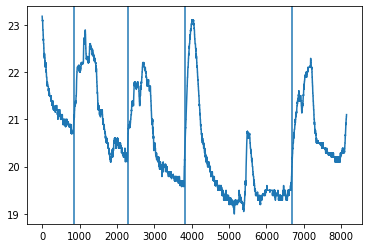

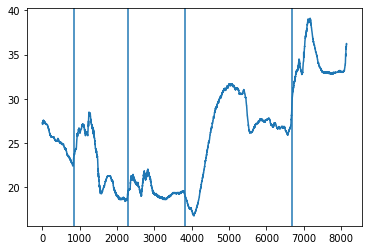

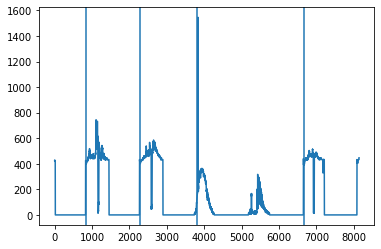

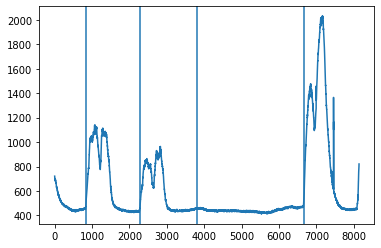

In [62]:
for i in range(4):
    plt.figure()
    plt.plot(series[:,i])
    for label in labels:
        plt.axvline(label*16)

In [68]:

ts = pd.DataFrame(series)
ts.to_csv(f'../data/occupancy/occupancy_ts.csv', header = None)

df_labels = pd.DataFrame(columns = [0,1])
cpts = labels  
start = 0 
for i,pt in enumerate(cpts):
        df_labels.loc[i] = [start, 16*pt-1]
        start = 16*pt
pt = series.shape[0]
df_labels.loc[i+1] = [start, pt-1]
df_labels.to_csv(f'../data/occupancy/occupancy_labels.csv', header = None, index= False)


